72 72
Length of fifth_plot_fast  is : 72
[['Category', 'Fast'], ['Slopes', '0.3929, 0.1401, -0.0055'], ['Intercepts', '0.2737, 0.0974, 0.0544'], ['Chi-squared stat', '0.2757'], ['P-value', '1.0000'], ['Breakpoints', '0.2008, 0.5065']]
71 71
[['Category', 'Medium'], ['Slopes', '0.0981, 0.0088'], ['Intercepts', '-0.0462, -0.0226'], ['Chi-squared stat', '0.2811'], ['P-value', '1.0000'], ['Breakpoints', '1.8384']]
71 71
[['Category', 'Slow'], ['Slopes', '0.2276, 0.0326'], ['Intercepts', '-0.0133, -0.0904'], ['Chi-squared stat', '0.2847'], ['P-value', '1.0000'], ['Breakpoints', '0.4026']]


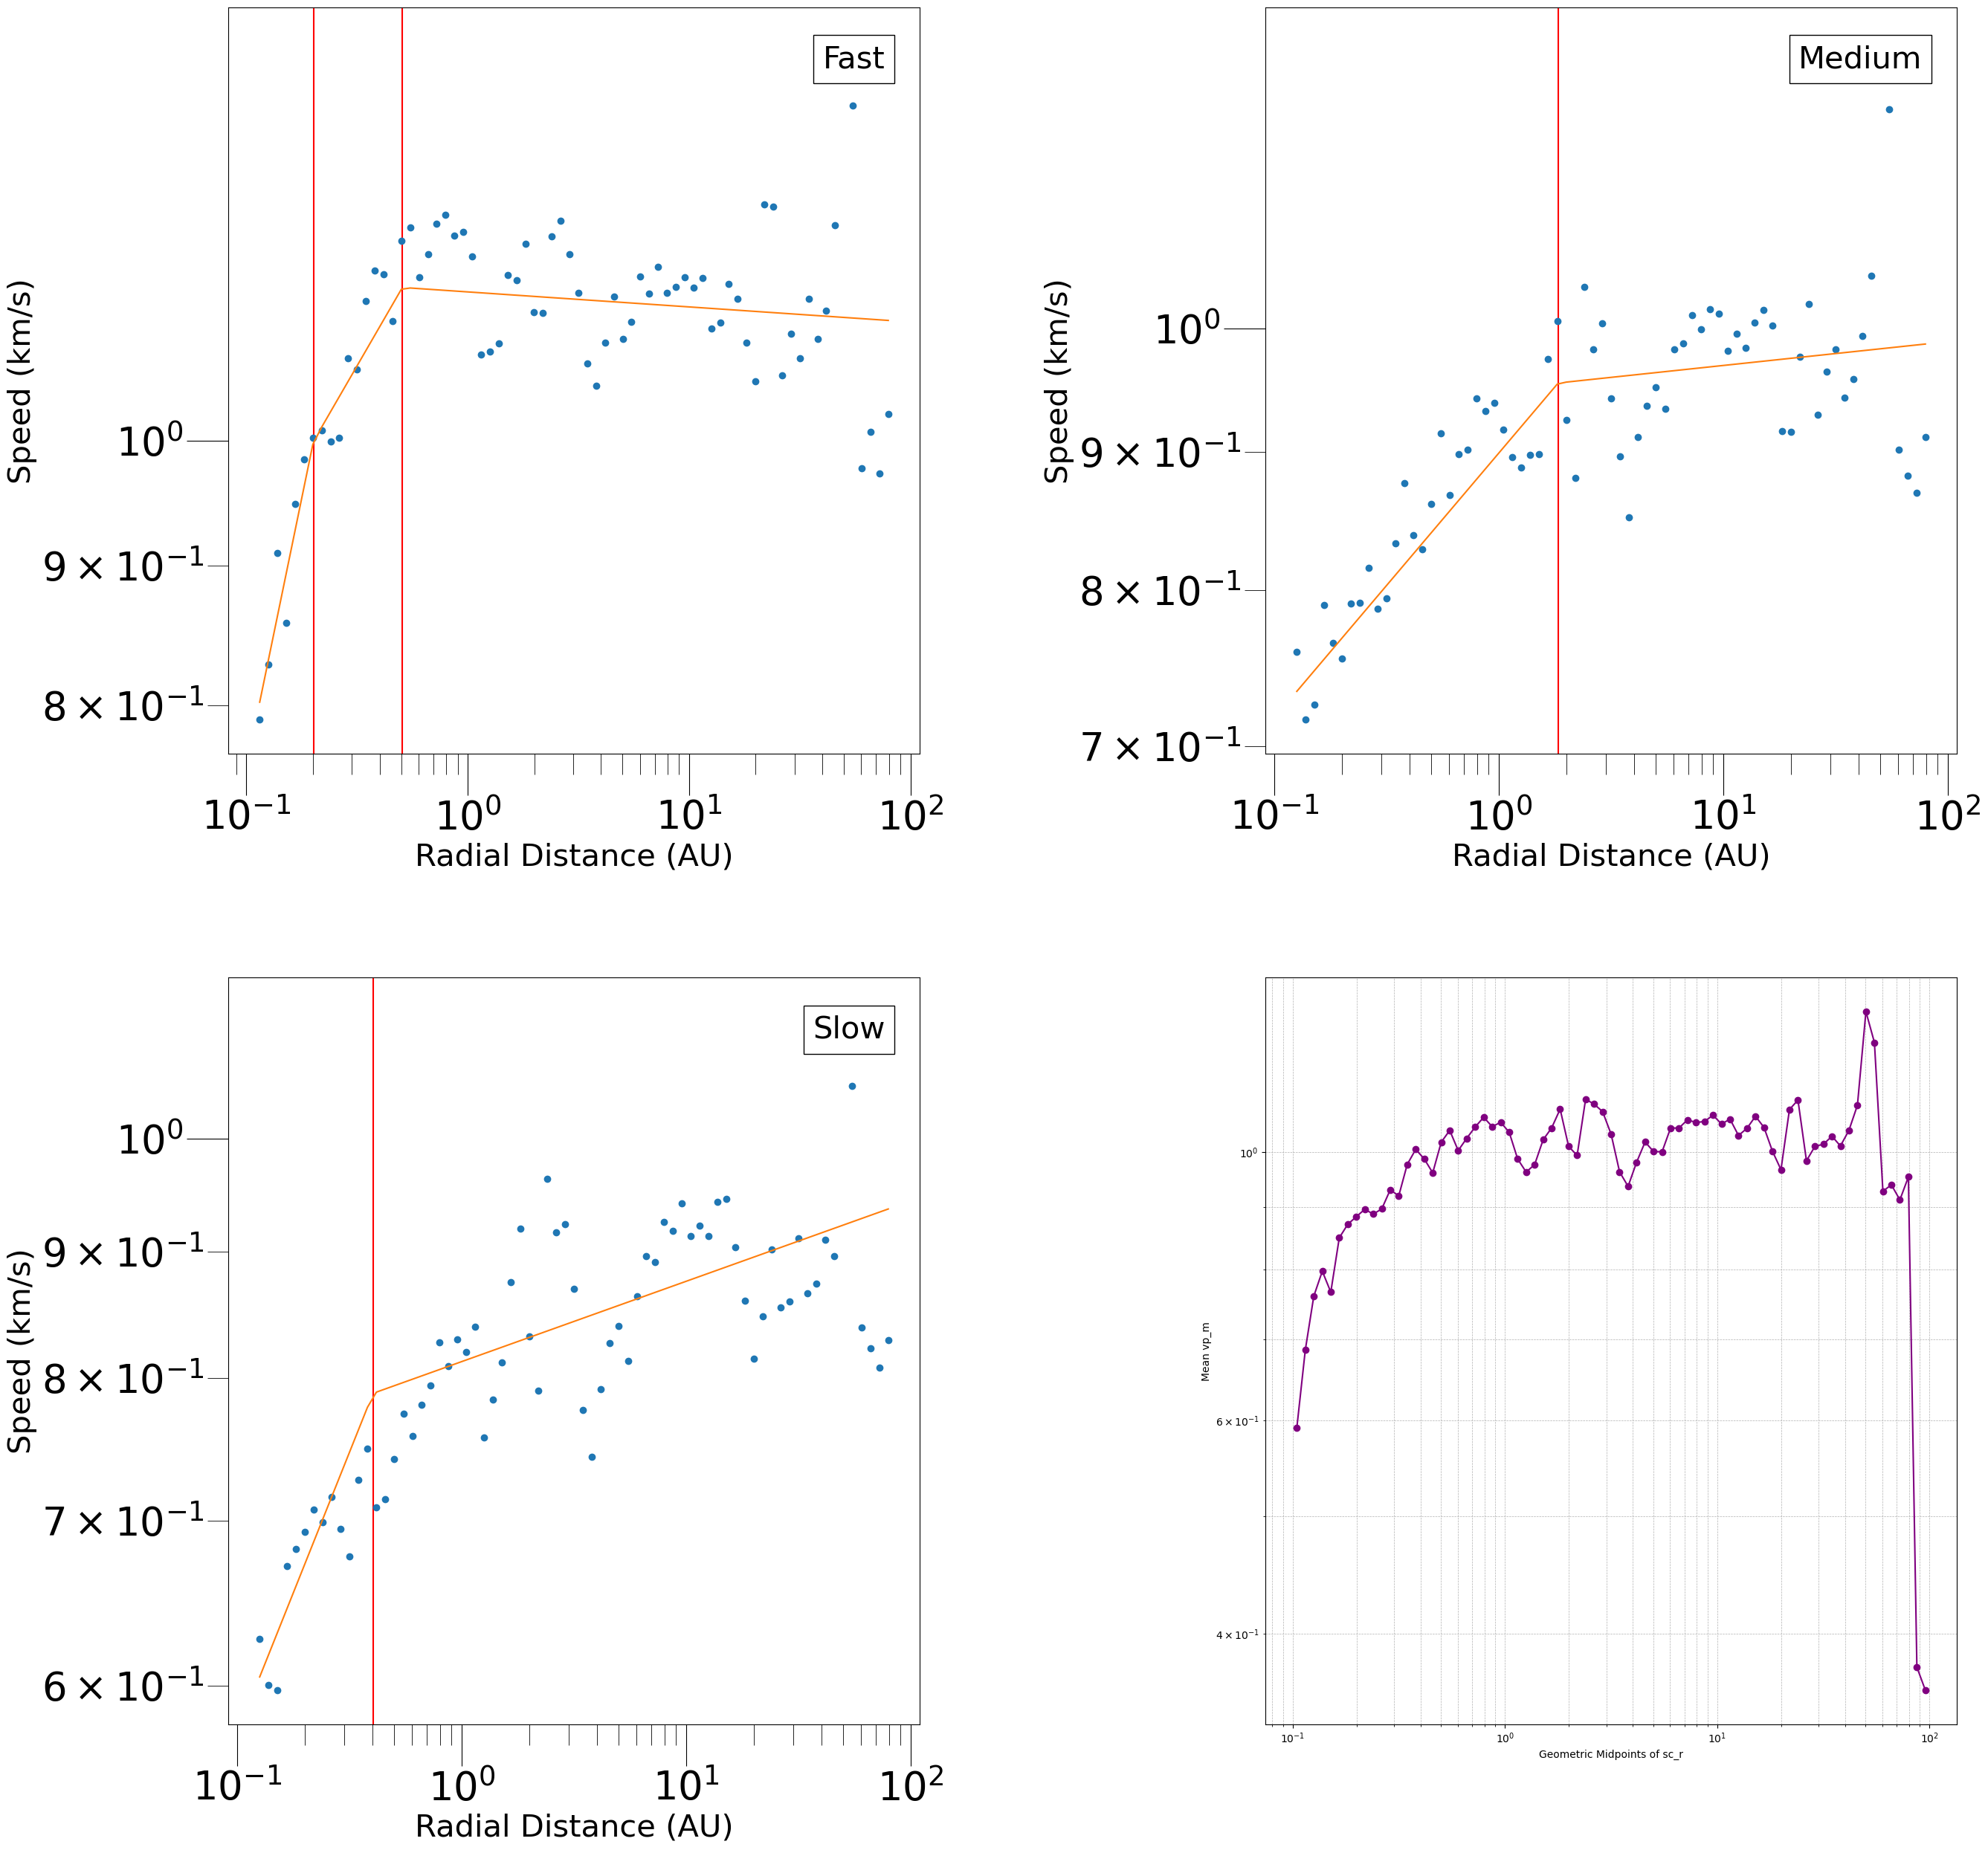

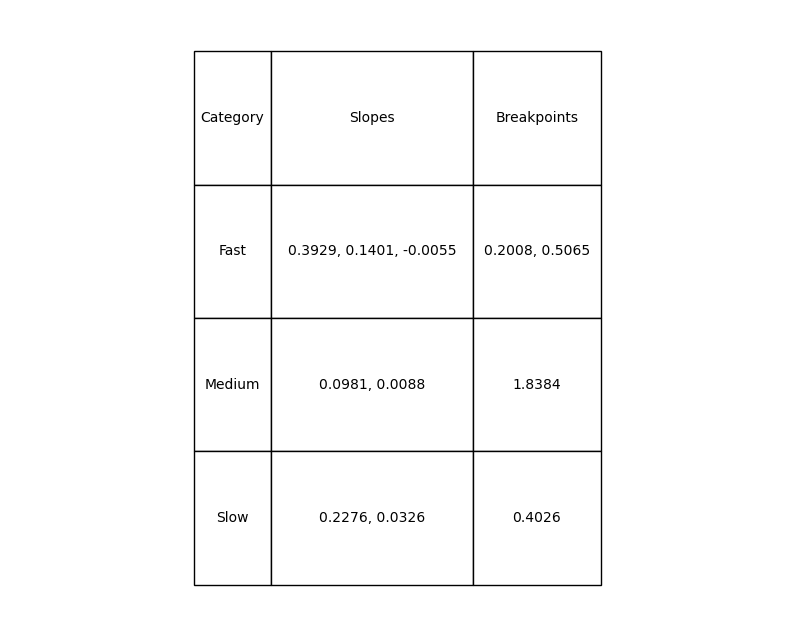

75 72 71 71 72 71 71 4


<Figure size 640x480 with 0 Axes>


Length of fifth_plot_fast  is : 47
[['Category', 'Fast'], ['Slopes', '-0.8595, -0.3334'], ['Intercepts', '-2.4452, 4.1233, 0.1758, -0.2116, -14.9593'], ['Chi-squared stat', '1.0644'], ['P-value', '1.0000'], ['Breakpoints', '0.1417, 5.4483, 71.1622']]
[['Category', 'Medium'], ['Slopes', '-1.0680, -0.5994'], ['Intercepts', '-12.2625, 2.4173, -0.1226, -0.1507, -4.7252'], ['Chi-squared stat', '0.6287'], ['P-value', '1.0000'], ['Breakpoints', '0.1586, 1.1481, 39.7748']]
[['Category', 'Slow'], ['Slopes', '-1.5212, -0.5491'], ['Intercepts', '6.2849, 0.1884, -0.4996, -0.3135, -5.6360'], ['Chi-squared stat', '1.5295'], ['P-value', '1.0000'], ['Breakpoints', '0.2494, 0.6436, 43.6636']]
75 75 75 75 47 49 55 2


ValueError: x and y must have same first dimension, but have shapes (75,) and (47,)

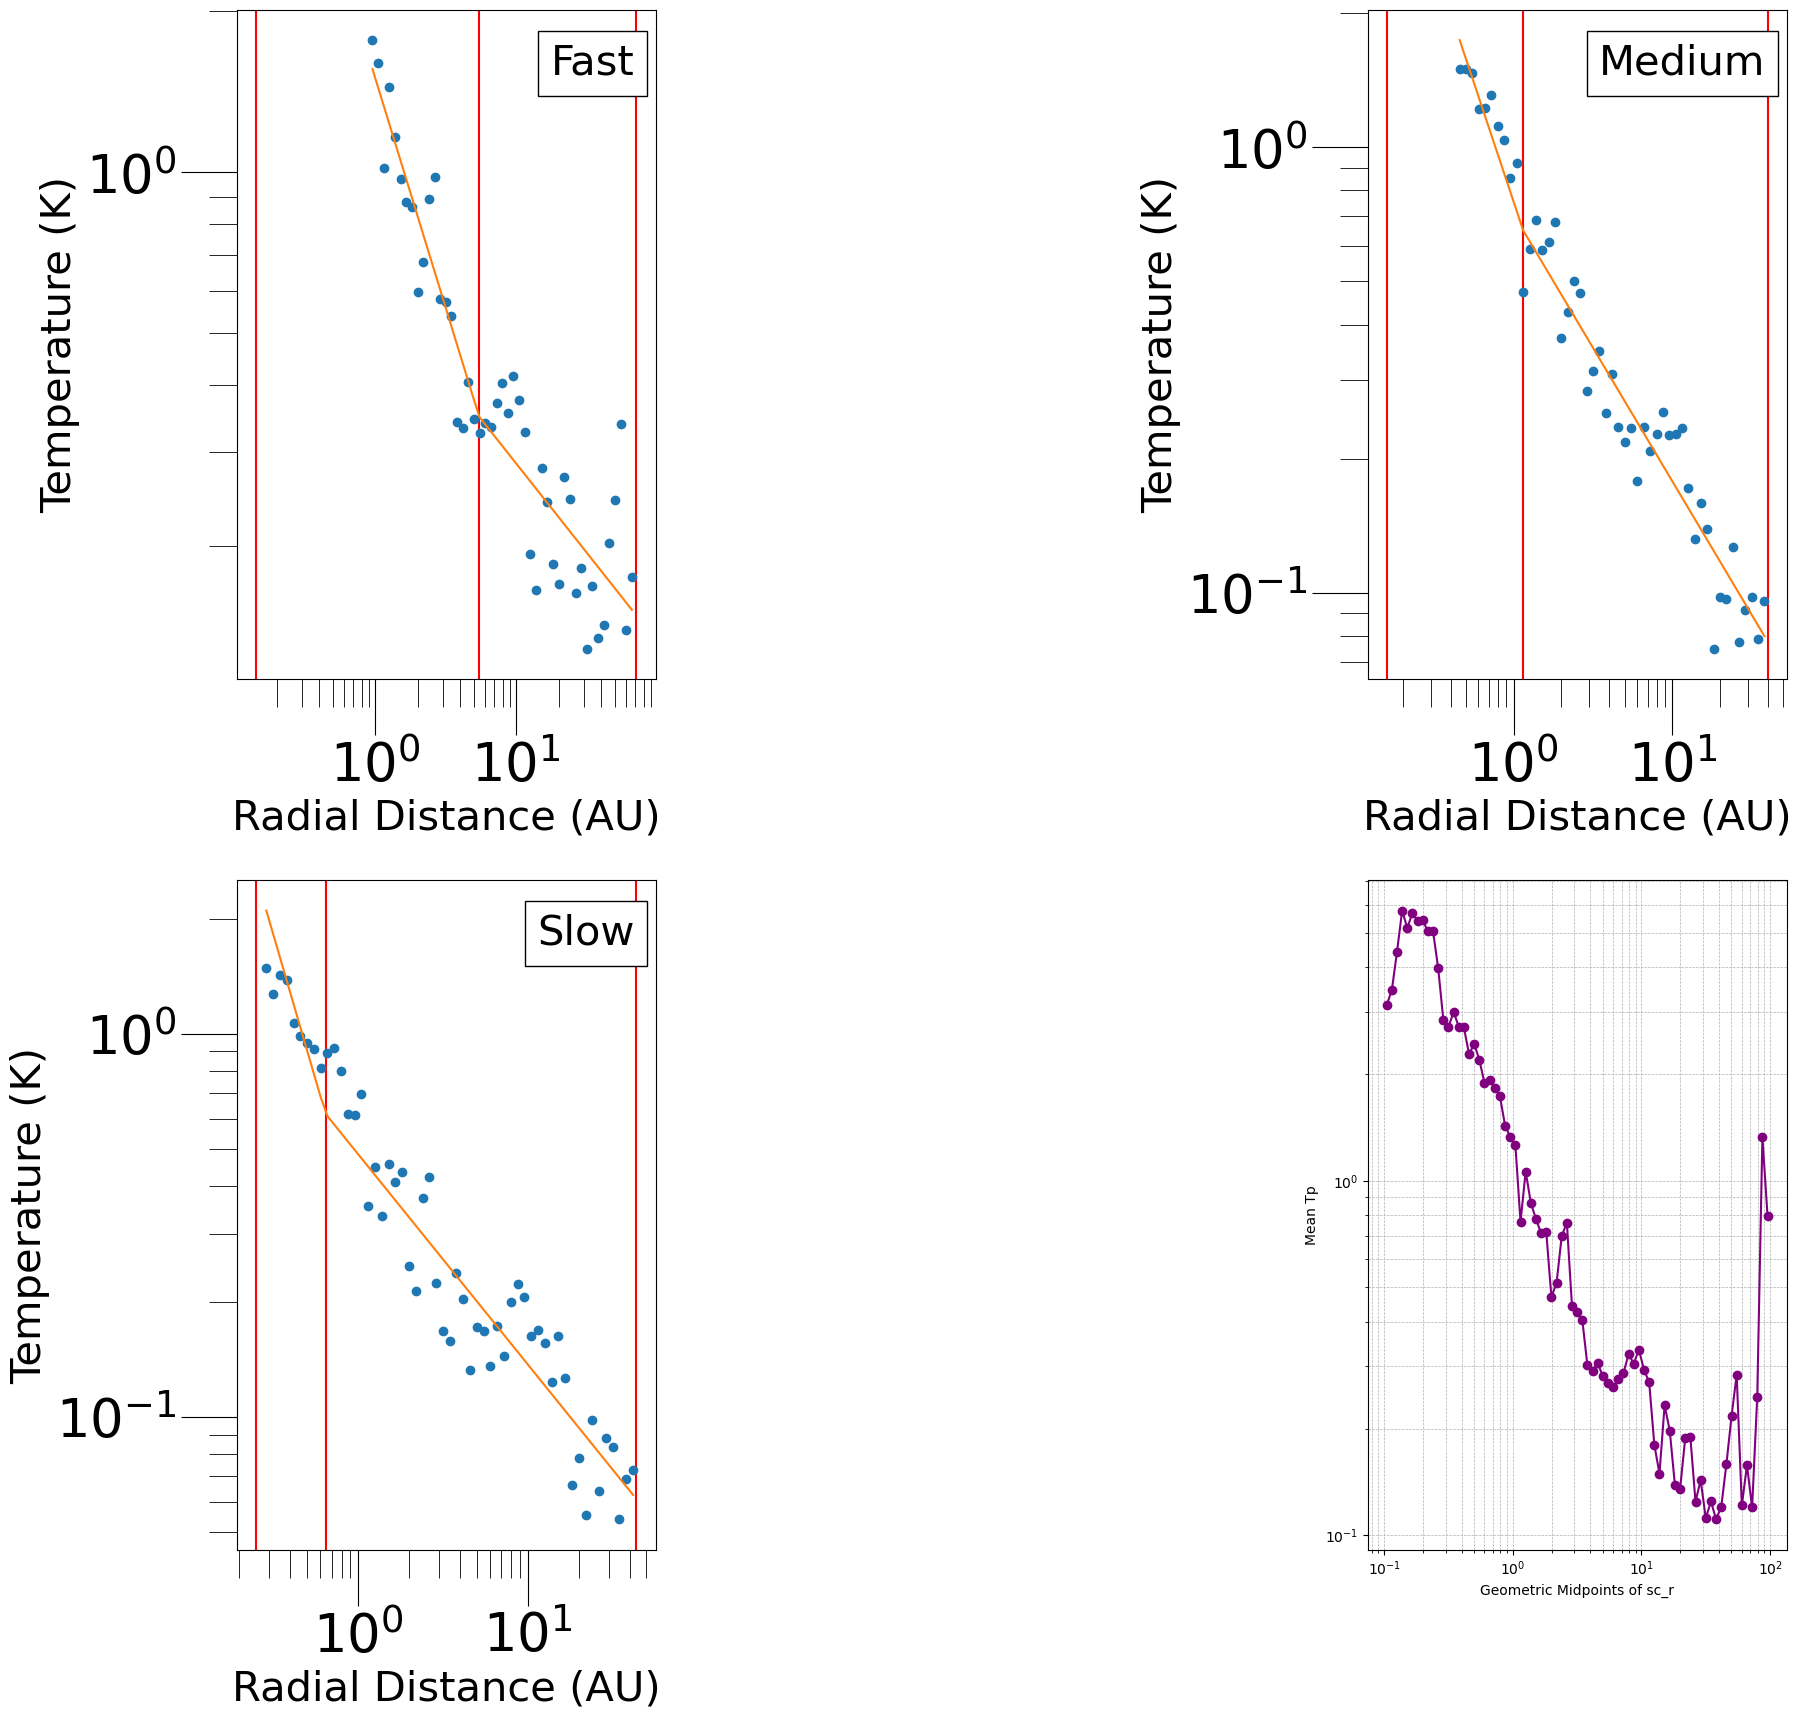

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
from scipy.optimize import curve_fit
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import chi2
import pwlf
import math

###################################### FUNCTIONS #################################

# For reproducibility 
np.random.seed(42) 

def plotting_function(
    param,
    mid_points_list,
    param_list,
    weights_list,
    mode,
    ax, fig,
    breakpoint_number,
    fontsize,
):

    # Generate the model using a package implementing curve_fit
    my_pwlf = pwlf.PiecewiseLinFit(
        np.log10(mid_points_list), np.log10(param_list), weights=weights_list
    )
    
    breaks = my_pwlf.fit(breakpoint_number)

    # Handle the Temperature plots (only retain the 3rd, 4th, and 5th breakpoints) 
    if param == "Tp":
        breaks = breaks[2:5]
        full_predicted_y = my_pwlf.predict(np.log10(mid_points_list))
        mid_points_array = np.array(mid_points_list)
        param_array = np.array(param_list)
        predicted_array = np.array(full_predicted_y)
        mask = (param_array >= (breaks[0])) & (param_array <= (breaks[2]))
        mid_points_list = mid_points_array[mask]
        param_list = param_array[mask]
        predicted_y = predicted_array[mask]

        if mode == "Fast":
            n = 4 
            mid_points_list = mid_points_list[:-n]
            param_list = param_list[:-n]
            predicted_y = predicted_y[:-n] 
        elif mode == "Medium":
            n = 10 
            mid_points_list = mid_points_list[:-n]
            param_list = param_list[:-n]
            predicted_y = predicted_y[:-n] 
        elif mode == "Slow":
            n = 9  
            mid_points_list = mid_points_list[:-n]
            param_list = param_list[:-n]
            predicted_y = predicted_y[:-n] 
    
    else:
        breaks = breaks[1:-1]
        predicted_y = my_pwlf.predict(np.log10(mid_points_list))
        print(len(predicted_y),len(mid_points_list))
        # print(predicted_y)
    
    # Plot the data
    ax.set_xscale("log")
    ax.set_yscale("log")
    for b in breaks:
        ax.axvline(10**b, color="r")
    ax.plot(mid_points_list, param_list, "o")
    ax.plot(mid_points_list, 10**predicted_y, "-")

    # For the fifth plot - combining the results of the predicted values for all modes 
    fifth_plot_fast = []
    fifth_plot_medium = []
    fifth_plot_slow = []
    if mode == "Fast":
        for element in predicted_y:
            fifth_plot_fast.append(10**element)
    elif mode == "Medium":
        for element in predicted_y:
            fifth_plot_medium.append(10**element)
    elif mode == "Slow":
        for element in predicted_y:
            fifth_plot_slow.append(10**element)
        
    if param == "vp_m":
        ax.set_ylabel("Speed (km/s)", fontsize=fontsize)
    elif param == "np":
        ax.set_ylabel("Density (cm^-3)", fontsize=fontsize)
    elif param == "Tp":
        ax.set_ylabel("Temperature (K)", fontsize=fontsize)
    elif param == "bm":
        ax.set_ylabel("Magnetic Field (nT)", fontsize=fontsize)
    ax.set_xlabel("Radial Distance (AU)", fontsize=fontsize)
    #ax.set_title(f"{mode} Solar Wind Speeds", fontsize=1.2 * fontsize)
    tick_size = 40
    label_size = 38
    ax.tick_params(axis="both", which="major", labelsize=label_size, length=tick_size)
    ax.tick_params(
        axis="both", which="minor", labelsize=label_size, length=tick_size / 2
    )

    # Add labels inside the plots 
    ax.text(0.95, 0.95, f"{mode}", 
        transform=ax.transAxes,
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'),
        horizontalalignment='right',
        verticalalignment='top',
        fontsize=fontsize) 
    
    fig_individual, ax_individual = plt.subplots(figsize=(30, 30))
    ax_individual.set_xscale("log")
    ax_individual.set_yscale("log")
    for b in breaks:
        ax_individual.axvline(10**b, color="r")
    ax_individual.plot(mid_points_list, param_list, "o")
    ax_individual.plot(mid_points_list, 10**predicted_y, "-")
    ax_individual.set_ylabel("Speed (km/s)", fontsize=fontsize)  
    ax_individual.set_xlabel("Radial Distance (AU)", fontsize=fontsize)
    ax_individual.tick_params(axis="both", which="major", labelsize=40, length=38)
    ax_individual.tick_params(axis="both", which="minor", labelsize=38, length=40 / 2)

    ax_individual.text(0.95, 0.95, f"{mode}", 
        transform=ax.transAxes,
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'),
        horizontalalignment='right',
        verticalalignment='top',
        fontsize=fontsize) 

    fig_individual.savefig(f"{mode}_individual_plots_{param}.pdf", format = "pdf")
    
    plt.close(fig_individual)


    # Calculate statistics
    slopes = my_pwlf.slopes
    if param == "Tp":
        slopes = slopes[2:4]
    intercepts = my_pwlf.intercepts
    observed = param_list
    predicted = 10**predicted_y
    degrees_freedom = len(observed) - len(slopes) - len(intercepts) - 1
    chi_squared_stat, p_value, fit_result = chi_squared_test(
        observed, predicted, degrees_freedom
    )


    # Prepare table data
    table_data = [
        ["Category", mode],
        ["Slopes", ", ".join(f"{s:.4f}" for s in slopes)],
        ["Intercepts", ", ".join(f"{i:.4f}" for i in intercepts)],
        ["Chi-squared stat", f"{chi_squared_stat:.4f}"],
        ["P-value", f"{p_value:.4f}"],
        ["Breakpoints", ", ".join(f"{10**b:.4f}" for b in breaks)],
    ]

    print(table_data)

    if mode == "Fast":
        return table_data, fifth_plot_fast

    elif mode == "Medium":
        return table_data, fifth_plot_medium

    elif mode == "Slow":
        return table_data, fifth_plot_slow
    
    #return table_data


# Function to calculate weights (inverse of the standard deviation in each bin)
def calculate_weights(df, category):
    weights_1 = df[df["wind_speed_category"] == category].groupby("bins", observed=False)["vp_m"].size()
    total = df[df["wind_speed_category"] == category].groupby("bins", observed=False)["vp_m"].count()
    weights_2 = np.sqrt(weights_1) / total
    weights_2 = weights_2.fillna(0).tolist()
    return weights_2


# Function to compute the Chi-squared statistic for each model
def chi_squared_test(observed, predicted, degrees_freedom, alpha=0.05):

    squared_residuals = [
        (obs - pred) ** 2 / pred for obs, pred in zip(observed, predicted)
    ]
    chi_squared_stat = sum(squared_residuals)

    p_value = 1 - chi2.cdf(chi_squared_stat, degrees_freedom)

    if p_value < alpha:
        fit_result = False
    else:
        fit_result = True

    return chi_squared_stat, p_value, fit_result


def clean_lists(mid_points_list, params_list, weights_list):

    valid_mid_points = []
    valid_params_list = []
    valid_weights = []

    for mid_point, bm, weight in zip(mid_points_list, params_list, weights_list):
        try:
            log_mid_point = np.log10(mid_point)
            log_bm = np.log10(bm)
            # Check if log values are finite (not inf or NaN)
            if np.isfinite(log_mid_point) and np.isfinite(log_bm):
                # If both values are valid, append to the new lists
                valid_mid_points.append(log_mid_point)
                valid_params_list.append(log_bm)
                valid_weights.append(weight)
        except (ValueError, OverflowError):
            # Skip invalid values
            continue

    return valid_mid_points, valid_params_list, valid_weights


import matplotlib.pyplot as plt

def table_formatter(param, results):
    
    columns = ["Category", "Slopes", "Breakpoints"]
    table_data = []

    for result in results:
        if isinstance(result, list) and len(result) >= 3:
            category = result[0]
            slopes = result[1]
            breakpoints = result[5]

            # Extract just the value, removing any labels
            category_value = (
                category[1]
                if isinstance(category, (list, tuple)) and len(category) > 1
                else category
            )

            # For slopes and breakpoints, extract the numeric value
            slopes_value = (
                slopes[1]
                if isinstance(slopes, (list, tuple)) and len(slopes) > 1
                else slopes
            )
            breakpoints_value = (
                breakpoints[1]
                if isinstance(breakpoints, (list, tuple)) and len(breakpoints) > 1
                else breakpoints
            )

            # Remove any remaining quotes
            slopes_value = (
                slopes_value.strip("'")
                if isinstance(slopes_value, str)
                else slopes_value
            )
            breakpoints_value = (
                breakpoints_value.strip("'")
                if isinstance(breakpoints_value, str)
                else breakpoints_value
            )

            row = [category_value, slopes_value, breakpoints_value]
            table_data.append(row)
        else:
            print(f"Unexpected result format: {result}")

    # Add the header row at the beginning
    table_data.insert(0, columns)

    # Create a new figure for the table
    fig_table = plt.figure(figsize=(10, 8))  # Adjust size as needed
    ax_table = fig_table.add_subplot(111)  # Add a single subplot

    # Hide the axes
    ax_table.axis("off")
    
    # Add the table to the figure
    table = ax_table.table(cellText=table_data, cellLoc="center", loc="center")
    table.auto_set_font_size(False)
    
    # Set font size and scaling based on the parameter
    if param == "Tp":
        table.set_fontsize(10)
        table.scale(1, 3.0)
    else:
        table.set_fontsize(10)
        table.scale(1, 8.0)

    # Auto-adjust the column widths
    table.auto_set_column_width(col=list(range(len(table_data[0]))))

    # Save the table figure as a PNG file
    fig_table.savefig(f"{param}_table.png", bbox_inches='tight')
    plt.show() 

def plotting_function_2(mid_points_list, mean_param_overall, param, ax): 
    ax.plot(mid_points_list, mean_param_overall, marker='o', linestyle='-', color='purple', label=f'Mean {param}')
    ax.set_xlabel("Geometric Midpoints of sc_r")
    ax.set_ylabel(f"Mean {param}")
    ax.set_xscale('log') 
    ax.set_yscale('log')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    fig_individual, ax_individual = plt.subplots(figsize=(30, 30))
    ax_individual.set_xscale("log")
    ax_individual.set_yscale("log")
    ax_individual.plot(mid_points_list, mean_param_overall, marker='o', 
                       linestyle='-', color='purple', label=f'Mean {param}')
    ax_individual.set_xlabel("Radial Distance (AU)")
    fig_individual.savefig(f"individual_plots_before_binning_{param}.pdf", format = "pdf")
    plt.close(fig_individual)

def plotting_function_3(mid_points_list_fast, mid_points_list_medium, mid_points_list_slow,
                        fifth_plot_fast, fifth_plot_medium, fifth_plot_slow, param):
    plt.xscale("log")
    plt.yscale("log")
    plt.plot(mid_points_list_fast, fifth_plot_fast,'r-', label='Fast')
    plt.plot(mid_points_list_medium, fifth_plot_medium, 'b-', label='Medium')
    plt.plot(mid_points_list_slow, fifth_plot_slow, 'g-', label='Slow')
    plt.xlabel("Radial Distance (AU)")
    if param == "vp_m":
        plt.ylabel("Km/s")
    elif param == "Tp_m":
        plt.ylabel("K")
    elif param == "np":
        plt.ylabel("cm^-3")
    elif param == "bm":
        plt.ylabel("nT")
    plt.close()
            
def main_function(param):

    df = pd.read_pickle("all_spcaecraft_data_scaled_v2024.05.p")

    df.dropna(subset=["sc_r", "vp_m"], inplace=True)
    df = df[df["vp_m"] > 0]

    if param == "bm":
        df = df[df["bm"] > 0]

    # Define bins and calculate geometric midpoints
    bins = np.logspace(np.log10(0.1), np.log10(100), 76)
    labels = range(len(bins) - 1)
    df["bins"] = pd.cut(df["sc_r"], bins=bins, include_lowest=True, labels=labels)
    mid_points = np.sqrt(bins[:-1] * bins[1:])
    mid_points_list = mid_points.tolist()

    # Calculate percentile cutoffs within each bin
    percentile_cutoffs = df.groupby("bins", observed=False)["vp_m"].quantile([0.30, 0.40]).unstack()

    # Rename columns for clarity
    percentile_cutoffs.columns = ["p30", "p40"]

    # Merge percentile cutoffs into the main DataFrame
    df = df.join(percentile_cutoffs, on="bins")

    # Label data with wind speed categories
    conditions = [
        df["vp_m"] <= df["p30"],
        (df["vp_m"] > df["p30"]) & (df["vp_m"] <= df["p40"]),
        df["vp_m"] > df["p40"],
    ]
    choices = ["slow", "medium", "fast"]
    df["wind_speed_category"] = np.select(conditions, choices, default="fast")

    # Filter out rows with NaN means before plotting or modeling
    df.dropna(subset=["p30", "p40"], inplace=True)

    # Group by bins and wind_speed_category and calculate the mean vp_m for each group
    mean_param = df.groupby(["bins", "wind_speed_category"], observed=False)[param].mean().unstack()
    
    # Plot the curves of the points after binning for each parameter 
    mean_param_overall = df.groupby("bins", observed=False)[param].mean()
    mean_param_overall = mean_param_overall.tolist()

    # Create lists for the average vp_m values per bin for each category
    param_slow = mean_param["slow"].tolist()
    param_medium = mean_param["medium"].tolist()
    param_fast = mean_param["fast"].tolist()

    # Calculate weights for each category
    weights_slow = calculate_weights(df, "slow")
    weights_medium = calculate_weights(df, "medium")
    weights_fast = calculate_weights(df, "fast")
    
    mid_points_list_fast = mid_points_list.copy()
    mid_points_list_medium = mid_points_list_fast.copy()
    mid_points_list_slow = mid_points_list_medium.copy()

    if param == "vp_m":

        fig, axs = plt.subplots(
            2, 2, figsize=(30, 30), gridspec_kw={"hspace": 0.3, "wspace": 0.5})

        axs[0, 0].set_aspect("auto")
        axs[0, 1].set_aspect("auto")
        axs[1, 0].set_aspect("auto")
        axs[1, 1].set_aspect("auto") 

        results = []
        breakpoint_number = 3

        # Analysis for the fast solar wind speeds
        highest_value_x = max(mid_points_list)
        highest_value_y_index = mid_points_list.index(highest_value_x)
        param_fast.pop(highest_value_y_index)
        mid_points_list_fast = mid_points_list.copy()
        mid_points_list_fast.remove(highest_value_x)
        weights_fast.pop(highest_value_y_index)

        second_highest_value_x = max(mid_points_list_fast)
        second_highest_value_y_index = mid_points_list_fast.index(
            second_highest_value_x
        )
        param_fast.pop(second_highest_value_y_index)
        mid_points_list_fast.remove(second_highest_value_x)
        weights_fast.pop(second_highest_value_y_index)

        lowest_value_x = min(mid_points_list_fast)
        lowest_value_y_index = mid_points_list_fast.index(lowest_value_x)
        param_fast.pop(lowest_value_y_index)
        mid_points_list_fast.remove(lowest_value_x)
        weights_fast.pop(lowest_value_y_index)
        fast_results, fifth_plot_fast= plotting_function(
            param,
            mid_points_list_fast,
            param_fast,
            weights_fast,
            mode="Fast",
            ax=axs[0, 0], fig = fig,
            breakpoint_number=breakpoint_number,
            fontsize=30,
        )
        results.append(fast_results)

        # Analysis for the Medium Solar Wind Speeds
        mid_points_list_medium = mid_points_list_fast.copy()
        param_medium.pop(highest_value_y_index)
        param_medium.pop(second_highest_value_y_index)
        weights_medium.pop(highest_value_y_index)
        weights_medium.pop(second_highest_value_y_index)

        param_medium.pop(lowest_value_y_index)
        weights_medium.pop(lowest_value_y_index)

        second_lowest_value_x = min(mid_points_list_medium)
        second_lowest_value_y_index = mid_points_list_medium.index(
            second_lowest_value_x
        )
        param_medium.pop(second_lowest_value_y_index)
        mid_points_list_medium.remove(second_lowest_value_x)
        weights_medium.pop(second_lowest_value_y_index)
        breakpoint_number = 2
        medium_results, fifth_plot_medium = plotting_function(
            param,
            mid_points_list_medium,
            param_medium,
            weights_medium,
            mode="Medium",
            ax=axs[0, 1], fig = fig,
            breakpoint_number=breakpoint_number,
            fontsize=30,
        )
        results.append(medium_results)

        # Analysis for the Slow Solar Wind Speeds
        mid_points_list_slow = mid_points_list_medium.copy()
        param_slow.pop(highest_value_y_index)
        param_slow.pop(second_highest_value_y_index)
        weights_slow.pop(highest_value_y_index)
        weights_slow.pop(second_highest_value_y_index)

        param_slow.pop(lowest_value_y_index)
        weights_slow.pop(lowest_value_y_index)
        param_slow.pop(second_lowest_value_y_index)
        weights_slow.pop(second_lowest_value_y_index)
        slow_results, fifth_plot_slow = plotting_function(
            param,
            mid_points_list_slow,
            param_slow,
            weights_slow,
            mode="Slow",
            ax=axs[1, 0], fig = fig,
            breakpoint_number=breakpoint_number,
            fontsize=30,
        )
        results.append(slow_results)

        plotting_function_2(mid_points_list, mean_param_overall, param, ax = axs[1, 1])
        
        table_formatter(param, results)

        print(len(mid_points_list), len(mid_points_list_fast), len(mid_points_list_medium), len(mid_points_list_slow),
                            len(fifth_plot_fast), len(fifth_plot_medium), len(fifth_plot_slow), len(param))

        plotting_function_3(mid_points_list_fast, mid_points_list_medium, mid_points_list_slow,
                            fifth_plot_fast, fifth_plot_medium, fifth_plot_slow,param)

        plt.tight_layout()
        #plt.savefig("solar_winds_analysis_speed.png", dpi=300, bbox_inches="tight")
        #plt.savefig("solar_winds_analysis_speed.pdf", dpi=300, format = "pdf")
        plt.savefig("output_image_speed.pdf", format="pdf")
        plt.show()
        plt.close() 

    elif param == "np" or param == "Tp":

        if param == "np":
            breakpoint_number = 2

        elif param == "Tp":
            breakpoint_number = 5

        fig, axs = plt.subplots(
            2, 2, figsize=(20, 20), gridspec_kw={"hspace": 0.3, "wspace": 1.7}
        )
        axs[0, 0].set_aspect("auto")
        axs[0, 1].set_aspect("auto")
        axs[1, 0].set_aspect("auto")
        axs[1, 1].set_aspect("auto")

        results = []

        # Analysis for the fast solar wind speeds
        fast_results, fifth_plot_fast = plotting_function(
            param,
            mid_points_list,
            param_fast,
            weights_fast,
            mode="Fast",
            ax=axs[0, 0],fig = fig,
            breakpoint_number=breakpoint_number,
            fontsize=30,
        )
        results.append(fast_results)

        # Analysis for the Medium Solar Wind Speeds
        medium_results, fifth_plot_medium = plotting_function(
            param,
            mid_points_list,
            param_medium,
            weights_medium,
            mode="Medium",
            ax=axs[0, 1],fig = fig,
            breakpoint_number=breakpoint_number,
            fontsize=30,
        )
        results.append(medium_results)

        # Analysis for the Slow Solar Wind Speeds
        slow_results, fifth_plot_slow = plotting_function(
            param,
            mid_points_list,
            param_slow,
            weights_slow,
            mode="Slow",
            ax=axs[1, 0],fig = fig,
            breakpoint_number=breakpoint_number,
            fontsize=30,
        )
        results.append(slow_results)

        plotting_function_2(mid_points_list, mean_param_overall, param, ax=axs[1, 1])
        
        print(len(mid_points_list), len(mid_points_list_fast), len(mid_points_list_medium), len(mid_points_list_slow),
                            len(fifth_plot_fast), len(fifth_plot_medium), len(fifth_plot_slow), len(param))
        
        plotting_function_3(mid_points_list, mid_points_list, mid_points_list,
                            fifth_plot_fast, fifth_plot_medium, fifth_plot_slow, param)

        table_formatter(param, results)

        plt.tight_layout()
        if param == "np":
            #plt.savefig("solar_winds_analysis_np.png", dpi=300, bbox_inches="tight")
            plt.savefig("output_image_np.pdf", format="pdf")
            plt.show()
        elif param == "Tp":
            #plt.savefig("solar_winds_analysis_Tp.png", dpi=300, bbox_inches="tight")
            plt.savefig("output_image_Tp.pdf", format="pdf")
            plt.show()
            plt.close() 

    elif param == "bm":

        fig, axs = plt.subplots(
            2, 2, figsize=(20, 20), gridspec_kw={"hspace": 0.7, "wspace": 0.7}
        )

        axs[0, 0].set_aspect("auto")
        axs[0, 1].set_aspect("auto")
        axs[1, 0].set_aspect("auto")
        axs[1, 1].set_aspect("auto")

        results = []
        breakpoint_number = 2

        fast_results, fifth_plot_fast = plotting_function(
            param,
            mid_points_list,
            param_fast,
            weights_fast,
            mode="Fast",
            ax=axs[0, 0],fig = fig,
            breakpoint_number=breakpoint_number,
            fontsize=30,
        )
        results.append(fast_results)

        medium_results, fifth_plot_medium = plotting_function(
            param,
            mid_points_list,
            param_medium,
            weights_medium,
            mode="Medium",
            ax=axs[0, 1],fig = fig,
            breakpoint_number=breakpoint_number,
            fontsize=30,
        )
        results.append(medium_results)

        slow_results, fifth_plot_slow = plotting_function(
            param,
            mid_points_list,
            param_slow,
            weights_slow,
            mode="Slow",
            ax=axs[1, 0],fig = fig,
            breakpoint_number=breakpoint_number,
            fontsize=30,
        )
        results.append(slow_results)

        plotting_function_2(mid_points_list, mean_param_overall, param, ax=axs[1, 1])

        plotting_function_3(mid_points_list, mid_points_list, mid_points_list,
                            fifth_plot_fast, fifth_plot_medium, fifth_plot_slow, param)

        table_formatter(param, results)
        
        plt.tight_layout()
        #plt.savefig("solar_winds_analysis_bm.pdf", dpi=300, bbox_inches="tight")
        plt.savefig("output_image_bm.pdf", format="pdf")
        plt.show()
        plt.close() 


##################################################################################


parameters = ["vp_m", "Tp", "np", "bm"]

for param in parameters:

    main_function(param)

    print()


